# 计算龙头

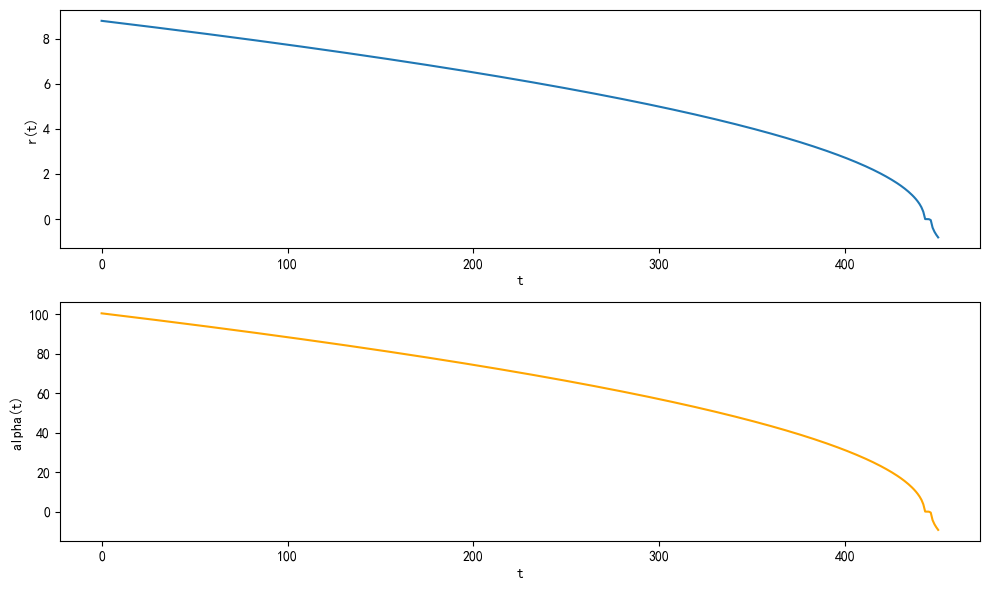

In [39]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# 定义常量
l = 0.55  # l 的值
pi = np.pi

# 定义微分方程
def system(t, y):
    r, alpha = y
    # 方程1中的 d(alpha)/dt
    dalpha_dt = - np.sqrt(1 / (r**2 * (1 + (l**2) / (4 * pi**2 * r**2))**2))
    # 方程2中的 d(r)/dt
    dr_dt = l * dalpha_dt / (2 * pi)
    return [dr_dt, dalpha_dt]

# 初始条件
r0 = 8.8
alpha0 = 32 * pi
y0 = [r0, alpha0]

# 时间范围
t_span = [0,450]  # 从 t=0 到 t=10
t_eval = np.linspace(t_span[0], t_span[1], 451)

# 求解微分方程
sol = solve_ivp(system, t_span, y0, t_eval=t_eval)

# 提取结果
r_sol = sol.y[0]
alpha_sol = sol.y[1]
t_sol = sol.t

# 绘制 r(t) 和 alpha(t) 的关系图
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t_sol, r_sol, label='r(t)')
# plt.title('Solution of r(t) and alpha(t)')
plt.xlabel('t')
plt.ylabel('r(t)')
# plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t_sol, alpha_sol, label='alpha(t)', color='orange')
plt.xlabel('t')
plt.ylabel('alpha(t)')
# plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# 绘制 r(t) 与 alpha(t) 的关系图
plt.figure(figsize=(8, 6))
plt.plot(alpha_sol, r_sol, label='r(α)', color='green')
# plt.title('Relationship between r(t) and alpha(t)')
plt.xlabel('alpha(t)')
plt.ylabel('r(t)')
# plt.grid(True)
plt.show()

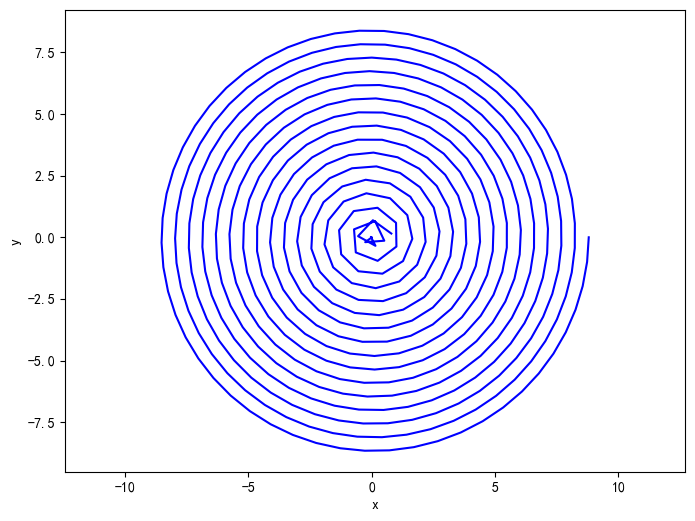

In [40]:
# 绘制 x = r*cos(alpha) 和 y = r*sin(alpha) 的图像
x = r_sol * np.cos(alpha_sol)
y = r_sol * np.sin(alpha_sol)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Trajectory (x, y)', color='blue')
# plt.title('Trajectory in Cartesian Coordinates')
plt.xlabel('x')
plt.ylabel('y')
# plt.grid(True)
plt.axis('equal')  # 确保比例尺相同
plt.show()

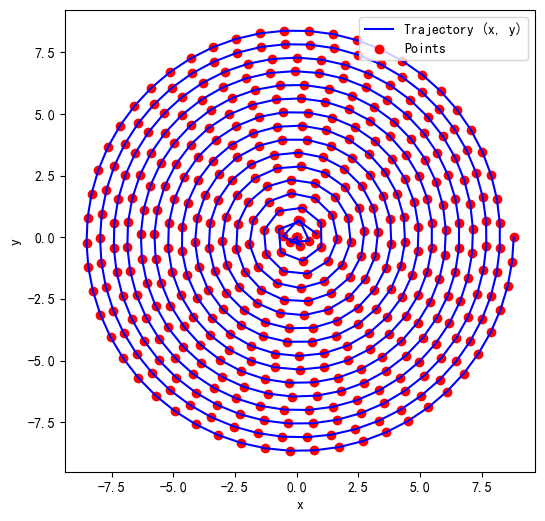

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体
plt.rcParams['axes.unicode_minus'] = False  # 解决坐标轴负号显示问题

# 将极坐标转换为笛卡尔坐标
x = r_sol * np.cos(alpha_sol)
y = r_sol * np.sin(alpha_sol)

plt.figure(figsize=(8, 6))

# 绘制轨迹
plt.plot(x, y, label='Trajectory (x, y)', color='blue')

# 绘制点
plt.scatter(x, y, color='red', marker='o', label='Points')

# 图形设置
# plt.title('等距螺线及其上的点')
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal', adjustable='box')
# plt.grid(True)
plt.legend()
plt.show()

In [42]:
points_values = pd.DataFrame()
points_x  = pd.DataFrame()
points_y = pd.DataFrame()
points_values["龙头坐标"]=list(zip(x, y))
points_x["龙头坐标x"] = x
points_y["龙头坐标y"] = y

In [43]:
points_values

,龙头坐标
0,"(8.8, -3.448605386398947e-14)"
1,"(8.733302426176627, -0.9971838526706541)"
2,"(8.55383611837242, -1.9803488343056626)"
3,"(8.263798145156374, -2.936746676774618)"
4,"(7.866828261599743, -3.8539331794340654)"
...,...
446,"(-0.03490256999549414, 0.01646925688556964)"
447,"(0.1506967453928268, -0.3449689153905976)"
448,"(-0.5553329681281366, 0.04600768862286307)"
449,"(0.04635828620382936, 0.6918055210892928)"


In [31]:
points_values.loc[400]

龙头坐标    (2.6216672812688135, -0.745979249234865)
Name: 400, dtype: object

In [7]:
import pandas as pd
# 创建 DataFrame
points = pd.DataFrame({
    't':t_eval, 
    'r': sol.y[0],
    'alpha_龙头': sol.y[1],
})

In [8]:
points

,t,r,alpha_龙头
0,0.0,8.800000,100.530965
1,1.0,8.790048,100.417276
2,2.0,8.780085,100.303457
3,3.0,8.770111,100.189510
4,4.0,8.760125,100.075433
...,...,...,...
446,446.0,-0.038593,-0.440886
447,447.0,-0.376448,-4.300531
448,448.0,-0.557236,-6.365844
449,449.0,-0.693357,-7.920892


# 计算第二节点

In [9]:
import numpy as np
import matplotlib.pyplot as plt
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体
plt.rcParams['axes.unicode_minus'] = False  # 解决坐标轴负号显示问题
def plot_spiral_with_points(point):
    # 等距螺线的参数
    p = 0.55  # 螺距
    b = p / (2 * np.pi)  # b参数由螺距p确定
    a = 0  # 初始半径

    # 生成螺线的角度范围
    theta = np.linspace(0, 2 * np.pi * 16, 1000)  # 从0到16圈

    # 计算螺线半径
    r = a + b * theta

    # 将极坐标转换为笛卡尔坐标
    x_spiral = r * np.cos(theta)
    y_spiral = r * np.sin(theta)

    # 提取点数据
    x_points = []
    y_points = []
    for i, theta_point in point:
        r_point = a + b * theta_point
        x_point = r_point * np.cos(theta_point)
        y_point = r_point * np.sin(theta_point)
        x_points.append(x_point)
        y_points.append(y_point)

    # 绘制螺线
    plt.figure(figsize=(8, 8))
    plt.plot(x_spiral, y_spiral, label="等距螺线")
    
    # 绘制点
    plt.scatter(x_points, y_points, color='red', marker='o', label='点')

    # 图形设置
    plt.title("等距螺线及其上的点")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.gca().set_aspect('equal', adjustable='box')
#     plt.grid(True)
    plt.legend()
    plt.show()

# plot_spiral_with_points(point)


def plot_spiral_with_points_noi(point):
    # 等距螺线的参数
    p = 0.55  # 螺距
    b = p / (2 * np.pi)  # b参数由螺距p确定
    a = 0  # 初始半径

    # 生成螺线的角度范围
    theta = np.linspace(0, 2 * np.pi * 16, 1000)  # 从0到16圈

    # 计算螺线半径
    r = a + b * theta

    # 将极坐标转换为笛卡尔坐标
    x_spiral = r * np.cos(theta)
    y_spiral = r * np.sin(theta)

    # 提取点数据
    x_points = []
    y_points = []
    for  theta_point in point:
        r_point = a + b * theta_point
        x_point = r_point * np.cos(theta_point)
        y_point = r_point * np.sin(theta_point)
        x_points.append(x_point)
        y_points.append(y_point)

    # 绘制螺线
    plt.figure(figsize=(8, 8))
    plt.plot(x_spiral, y_spiral, label="等距螺线")
    
    # 绘制点
    plt.scatter(x_points, y_points, color='red', marker='o', label='点')
    plt.plot(x_points, y_points, color='red',linestyle='-', label='龙板凳')
    # 图形设置
#     plt.title("等距螺线及其上的点")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.gca().set_aspect('equal', adjustable='box')
#     plt.grid(True)
    plt.legend()
    plt.show()

# plot_spiral_with_points(point)

In [10]:
import numpy as np
from scipy.optimize import fsolve

# 螺旋线参数
a = 0  # 初始半径
p = 0.55  # 螺距为 0.55 米
b = p / (2 * np.pi)  # b参数由螺距 p 确定

# 已知弦长公式
def chord_length(theta1, theta2):
    r1 = a + b * theta1
    r2 = a + b * theta2
    return np.sqrt(r1**2 + r2**2 - 2 * r1 * r2 * np.cos(theta2 - theta1))

# 求解下一个角度
def find_next_angle(theta1, L):
    # 目标函数：根据弦长公式求解 theta2，使得弦长等于 L
    def objective(theta2):
        return chord_length(theta1, theta2) - L
    
    # 使用 fsolve 进行数值求解
    theta2_initial_guess = theta1 + 0.0005  # 初始猜测：下一角度在 theta1 之后
    theta2_solution = fsolve(objective, theta2_initial_guess)
    
    return theta2_solution[0]

# # 示例：已知角度 theta1 和弦长 L
# theta1 = 0  # 角度 θ1，单位为弧度
# L = 1  # 弦长，单位为米

# # 求解下一个角度
# theta2 = find_next_angle(theta1, L)
# print(f"下一个点的角度为: {theta2} 弧度")

In [11]:
L_1 = 2.86
L_2 = 1.65

In [12]:
points.columns

Index(['t', 'r', 'alpha_龙头'], dtype='object')

In [13]:
alpha_values = points[["alpha_龙头"]].values
point_1 = [find_next_angle(theta, L_1) for theta in alpha_values]
# point_1

c:\users\22231\appdata\local\programs\python\python37\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\users\22231\appdata\local\programs\python\python37\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


In [14]:
points["alpha_第1节龙身"] = point_1

In [15]:
points.columns

Index(['t', 'r', 'alpha_龙头', 'alpha_第1节龙身'], dtype='object')

In [16]:
for i in range(222):
    alpha_values = points[[f"alpha_第{i+1}节龙身"]].values
    point_tempt = [find_next_angle(theta, L_2) for theta in alpha_values]
    points[f"alpha_第{i+2}节龙身"] = point_tempt

In [18]:
points.to_excel("龙板凳对应的极坐标角度.xlsx")

In [19]:
points_test = points.drop(['t', 'r'], axis=1)
points_test

,alpha_龙头,alpha_第1节龙身,alpha_第2节龙身,alpha_第3节龙身,alpha_第4节龙身,alpha_第5节龙身,alpha_第6节龙身,alpha_第7节龙身,alpha_第8节龙身,alpha_第9节龙身,...,alpha_第214节龙身,alpha_第215节龙身,alpha_第216节龙身,alpha_第217节龙身,alpha_第218节龙身,alpha_第219节龙身,alpha_第220节龙身,alpha_第221节龙身,alpha_第222节龙身,alpha_第223节龙身
0,100.530965,100.856864,101.043848,101.230486,101.416779,101.602730,101.788340,101.973612,102.158546,102.343146,...,134.945785,135.085505,135.225081,135.364512,135.503800,135.642944,135.781945,135.920804,136.059522,136.198097
1,100.417276,100.743545,100.930740,101.117587,101.304089,101.490247,101.676063,101.861539,102.046677,102.231479,...,134.861167,135.000974,135.140637,135.280155,135.419530,135.558761,135.697849,135.836794,135.975597,136.114258
2,100.303457,100.630099,100.817505,101.004563,101.191273,101.377639,101.563662,101.749343,101.934686,102.119691,...,134.776495,134.916390,135.056141,135.195747,135.335208,135.474526,135.613700,135.752732,135.891621,136.030368
3,100.189510,100.516525,100.704143,100.891411,101.078332,101.264906,101.451136,101.637024,101.822571,102.007780,...,134.691770,134.831754,134.971592,135.111285,135.250834,135.390238,135.529500,135.668617,135.807593,135.946425
4,100.075433,100.402823,100.590654,100.778133,100.965264,101.152047,101.338485,101.524580,101.710333,101.895747,...,134.606992,134.747064,134.886990,135.026771,135.166407,135.305899,135.445247,135.584451,135.723513,135.862432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,-0.440886,32.766027,33.344041,33.911939,34.470239,35.019415,35.559904,36.092109,36.616403,37.133130,...,95.574482,95.771812,95.968734,96.165253,96.361369,96.557085,96.752405,96.947329,97.141862,97.336004
447,-4.300531,31.934303,32.527527,33.109822,33.681776,34.243926,34.796763,35.340741,35.876274,36.403748,...,95.296070,95.493977,95.691473,95.888561,96.085244,96.281523,96.477402,96.672883,96.867968,97.062660
448,-6.365844,-9.766627,-6.870934,-4.113556,-18.279058,-17.158960,-15.949516,-14.623223,-13.133263,-11.383454,...,88.811703,89.024077,89.235944,89.447307,89.658169,89.868536,90.078409,90.287793,90.496691,90.705106
449,-7.920892,23.663065,24.467227,25.244445,25.997303,26.727991,27.438387,28.130118,28.804599,29.463076,...,92.895987,93.099012,93.301595,93.503737,93.705442,93.906712,94.107550,94.307959,94.507941,94.707500


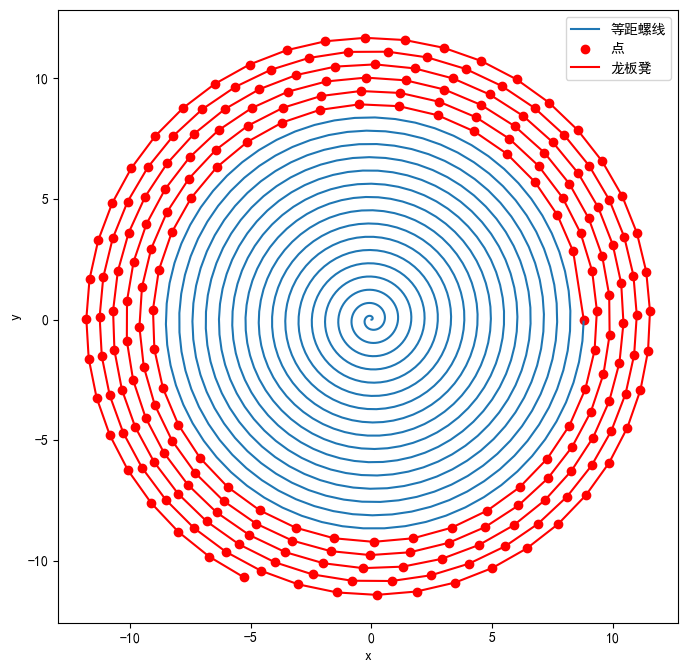

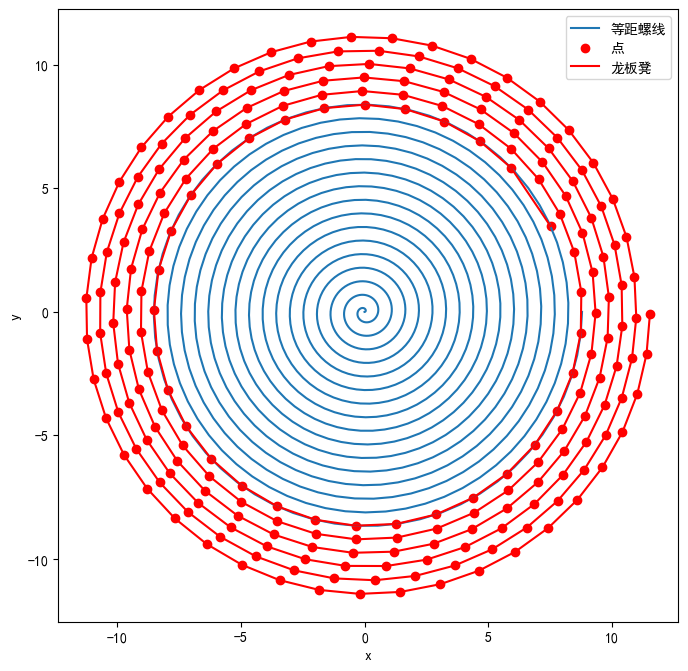

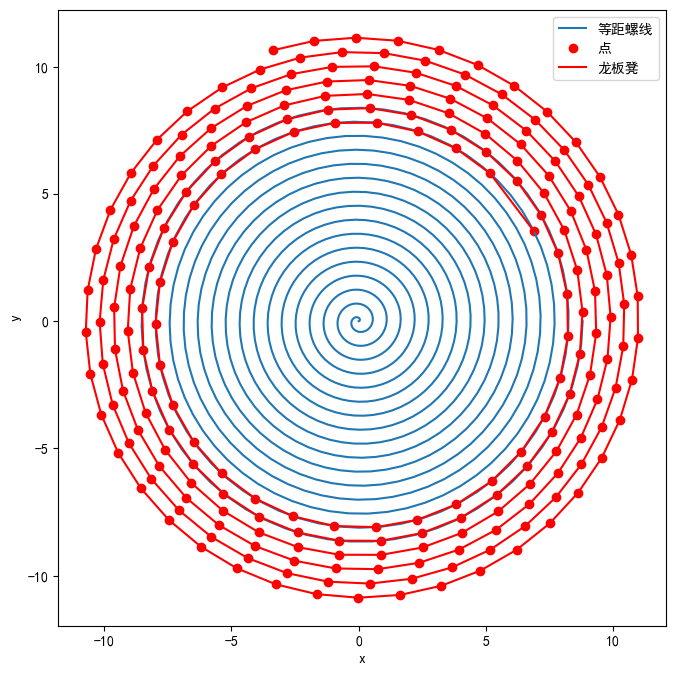

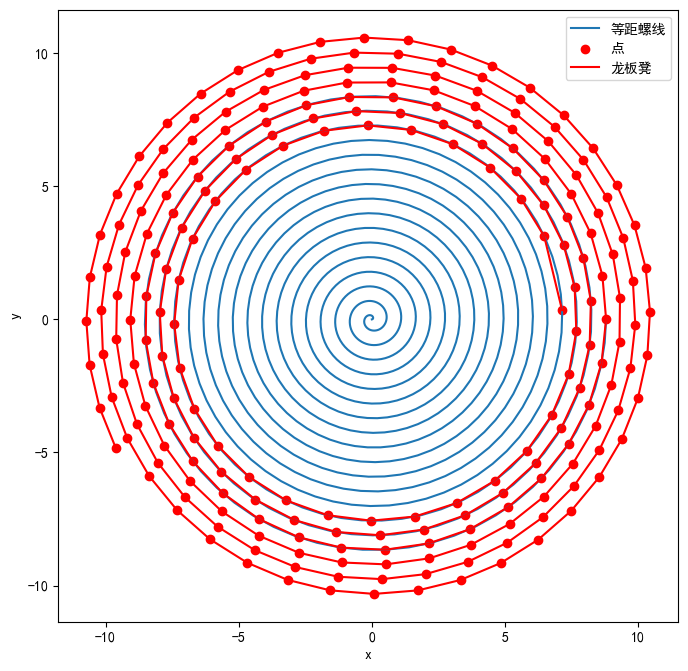

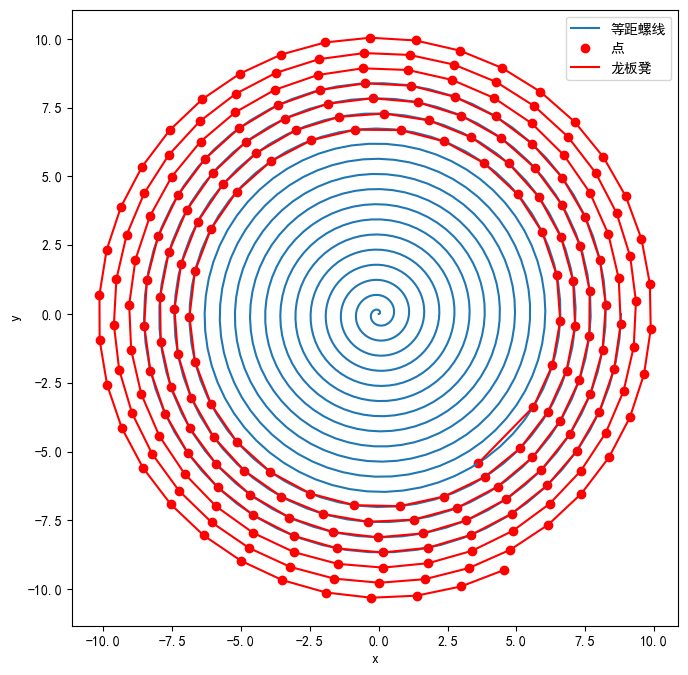

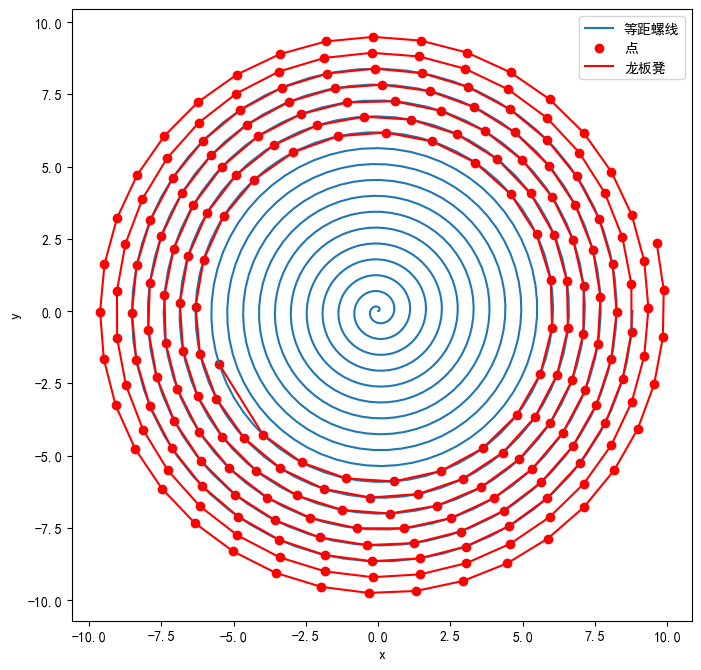

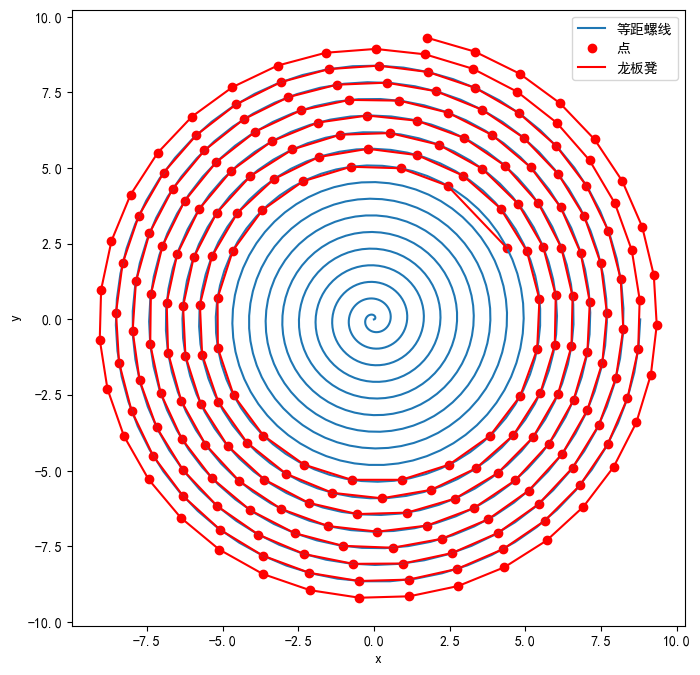

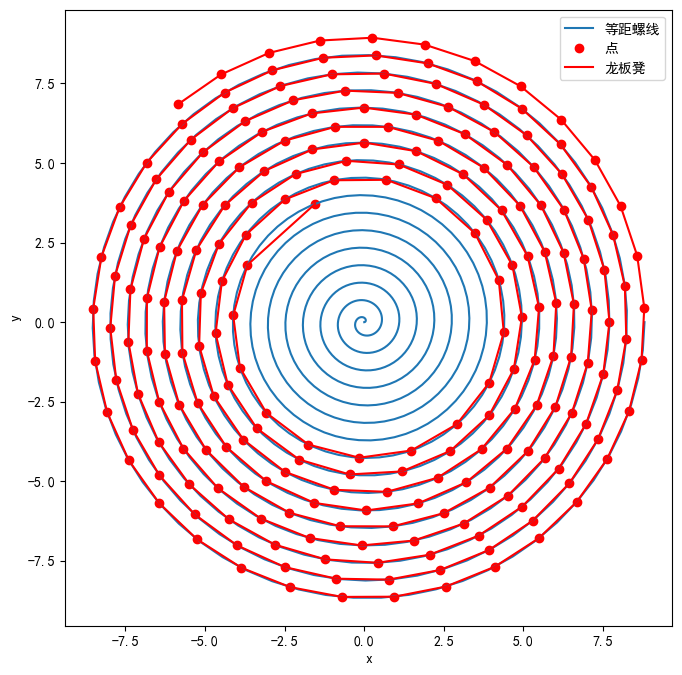

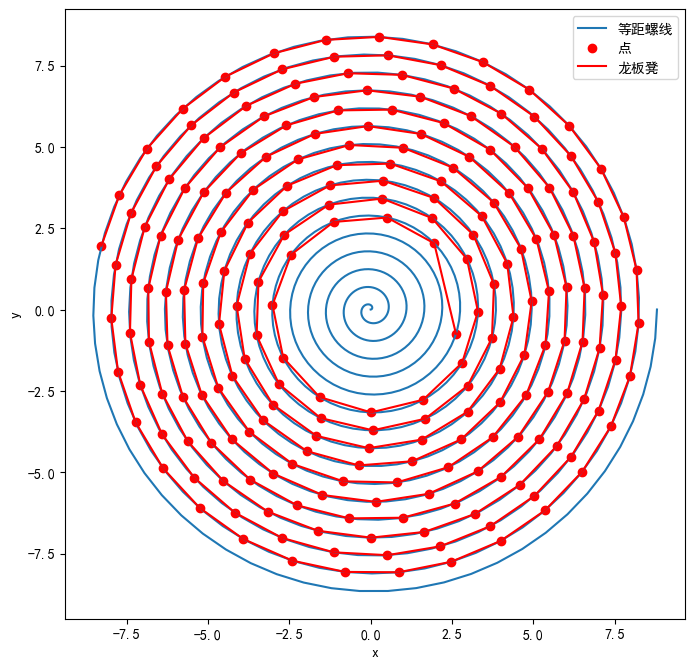

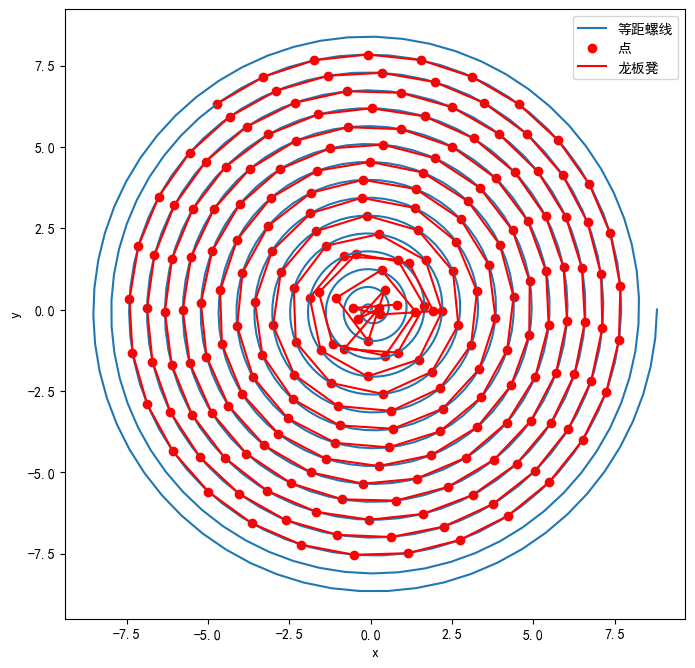

In [20]:
for i in range(10):
    row = points_test.iloc[i*50]
    plot_spiral_with_points_noi(row)

In [21]:
for i in range(223):
    alpha_values = points[[f"alpha_第{i+1}节龙身"]].values
    alpha_values = [x[0] for x in alpha_values]
    x_points = []
    y_points = []
    for  theta_point in alpha_values:
        r_point = a + b * theta_point
        x_point = r_point * np.cos(theta_point)
        y_point = r_point * np.sin(theta_point)
        x_points.append(x_point)
        y_points.append(y_point)
    points_x[f"第{i+1}节龙身x"] = x_points
    points_y[f"第{i+1}节龙身y"] = y_points
    points_values[f"第{i+1}节龙身"] = list(zip(x_points, y_points))

c:\users\22231\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if sys.path[0] == "":
c:\users\22231\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  del sys.path[0]
c:\users\22231\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` ma

In [ ]:
# i=0
# alpha_values = points[[f"alpha_第{i+1}节龙身"]].values
# alpha_values = [x[0] for x in alpha_values]
# x_points = []
# y_points = []
# for  theta_point in alpha_values:
#     r_point = a + b * theta_point
#     x_point = r_point * np.cos(theta_point)
#     y_point = r_point * np.sin(theta_point)
#     x_points.append(x_point)
#     y_points.append(y_point)


In [ ]:
# alpha_values = [x[0] for x in alpha_values]
# alpha_values

In [22]:
points_values.to_excel("板凳龙坐标.xlsx")
points_values

,龙头坐标,第1节龙身,第2节龙身,第3节龙身,第4节龙身,第5节龙身,第6节龙身,第7节龙身,第8节龙身,第9节龙身,...,第214节龙身,第215节龙身,第216节龙身,第217节龙身,第218节龙身,第219节龙身,第220节龙身,第221节龙身,第222节龙身,第223节龙身
0,"(8.8, -3.448605386398947e-14)","(8.363823851392665, 2.8265438909356706)","(7.706853796954709, 4.340112636503945)","(6.780179648838111, 5.705314095337742)","(5.616457183647519, 6.875036294836539)","(4.256359934685793, 7.8091858938603655)","(2.747104585341287, 8.4760054275161)","(1.1407705498281584, 8.853087602037744)","(-0.5075254201955949, 8.928056897044403)","(-2.141535034634457, 8.698900662322927)",...,"(-11.692444212732795, 1.6799146977889265)","(-11.824686796723604, 0.03522266005714078)","(-11.726697840763455, -1.6118651228216403)","(-11.400618920255463, -3.229323789248337)","(-10.853010355570873, -4.785802141132183)","(-10.094701501896315, -6.251226203455871)","(-9.140559626376717, -7.597373773887484)","(-8.009182578936866, -8.798409150770716)","(-6.722521871128986, -9.831368115581325)","(-5.305444039648723, -10.676584312495526)"
1,"(8.733302426176627, -0.9971838526706541)","(8.620099348094858, 1.860574895564237)","(8.138342441686738, 3.4386782771958915)","(7.371538641673406, 4.899675173932598)","(6.346883699516014, 6.192958688674107)","(5.100360033181315, 7.274013150418299)","(3.6754137918296657, 8.105895479385309)","(2.1213920427757276, 8.660437095007968)","(0.49179757972309224, 8.919129742716125)","(-1.1575760664339816, 8.873670141389093)",...,"(-11.50140878143487, 2.660455304634908)","(-11.772120231903266, 1.032814278307493)","(-11.813481063293821, -0.6166672407236735)","(-11.624922018881957, -2.2558577381245097)","(-11.210342024589716, -3.8529248714447086)","(-10.578009632016544, -5.37695103437682)","(-9.740380633971725, -6.798526801486524)","(-8.713836146645296, -8.090311000003943)","(-7.518346936627821, -9.227546924836872)","(-6.17707112427176, -10.188525173907735)"
2,"(8.55383611837242, -1.9803488343056626)","(8.765428990712481, 0.8718132326839985)","(8.46526106784101, 2.4942802487024807)","(7.868305598295215, 4.032507854542643)","(6.995919349303732, 5.433022842880837)","(5.878908233680894, 6.647430586418606)","(4.556374495407593, 7.634043231339852)","(3.074292598701774, 8.359255787385734)","(1.4838671971417443, 8.798626976771759)","(-0.16026704816522133, 8.937632672335319)",...,"(-11.228154566903235, 3.621330305429316)","(-11.63548393029779, 2.0223985402450197)","(-11.815985841374323, 0.38230126870985576)","(-11.766375797945319, -1.266952757687991)","(-11.487855199037622, -2.893275688714603)","(-10.986064933325949, -4.465123814086729)","(-10.27095330731308, -5.952105778449437)","(-9.356561657077497, -7.325564154221516)","(-8.26073253771299, -8.55911939868824)","(-7.0047468200748, -9.629166069206942)"
3,"(8.263798145156374, -2.936746676774618)","(8.797818778277406, -0.1270452756643846)","(8.683302585770958, 1.5189760005173258)","(8.264031419850228, 3.1148180006591604)","(7.555216081343837, 4.604811563023517)","(6.582062990717281, 5.937280347721052)","(5.378807991232504, 7.066296470814278)","(3.9874505241630436, 7.953214955693115)","(2.456236686873943, 8.56793780745998)","(0.8379473274001215, 8.889868776774644)",...,"(-10.874589420256862, 4.555639946701103)","(-11.415703393686757, 2.996891837557847)","(-11.734142394591279, 1.3779117256658027)","(-11.823921681669518, -0.26964394247118)","(-11.683528108745893, -1.9136602576825081)","(-11.31592648464462, -3.5221903462903263)","(-10.728479039936134, -5.064074096676231)","(-9.932780362425321, -6.509537210908793)","(-8.944411769329632, -7.8307591923262665)","(-7.78262059232842, -9.002399606890688)"
4,"(7.866828261599743, -3.8539331794340654)","(8.716724329665068, -1.1231317085308714)","(8.789544141362553, 0.525260621896958)","(8.55353862428763, 2.1582950354655344)","(8.017542286991347, 3.7188103113901256)","(7.200807525300819, 5.152492399244982)","(6.132239346335878, 6.409736228775647)","(4.849305629347168, 7.447320479717829)","(3.396665875009639, 8.229840603489787)","(1.8245702111100246, 8.730854798436361)",...,"(-10.44320115